In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=15000, n_features=2, n_informative=2, n_redundant=0,n_repeated=0,n_classes=2,n_clusters_per_class=1,weights=[0.95,0.05],class_sep=0.8,random_state=0)

In [4]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [5]:
df = pd.DataFrame(X,columns=['X1','X2'])
df['Target'] = y

In [6]:
df.head()

,X1,X2,Target
0,-2.473300,0.569620,0
1,1.647105,0.651006,0
2,-1.380968,1.003418,0
3,-2.592531,0.588387,0
4,-1.507043,0.647997,0


In [7]:
df['Target'].value_counts()

0    14183
1      817
Name: Target, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      15000 non-null  float64
 1   X2      15000 non-null  float64
 2   Target  15000 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 293.1 KB


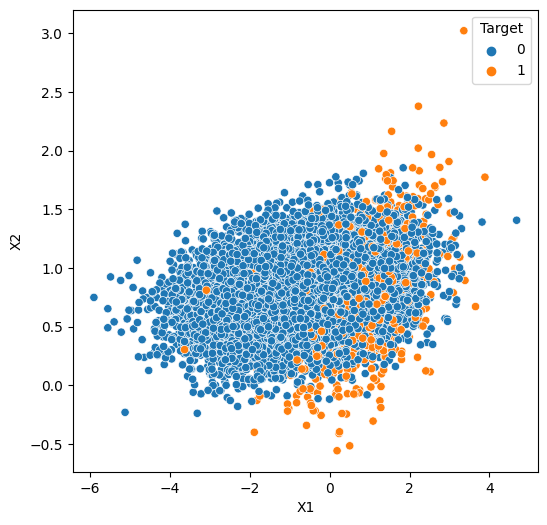

In [9]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='X1',y='X2',hue='Target')
plt.show()

In [10]:
from mpl_toolkits.mplot3d import Axes3D

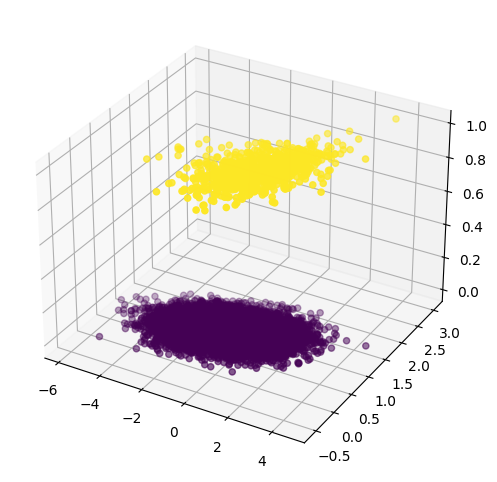

In [11]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111,projection='3d')
ax.scatter(df['X1'],df['X2'],df['Target'],c=df['Target'])
plt.show()

### ClusterCentroids

In [12]:
from imblearn.under_sampling import ClusterCentroids

In [13]:
cc = ClusterCentroids(random_state=0)

In [14]:
X_resamle, y_resample = cc.fit_resample(X,y)

c:\Users\NK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
df_new = pd.DataFrame(X_resamle,columns=['X1','X2'])
df_new['Target'] = y_resample

In [16]:
df_new['Target'].value_counts()

0    817
1    817
Name: Target, dtype: int64

In [17]:
df_new.head()

,X1,X2,Target
0,-0.565925,0.875405,0
1,-3.357815,0.681709,0
2,0.509337,0.649123,0
3,-1.675357,0.704883,0
4,1.243475,0.872663,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      15000 non-null  float64
 1   X2      15000 non-null  float64
 2   Target  15000 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 293.1 KB


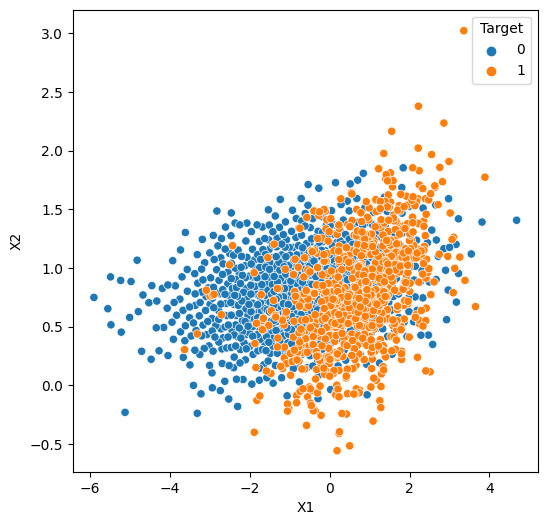

In [19]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_new,x='X1',y='X2',hue='Target')
plt.show()

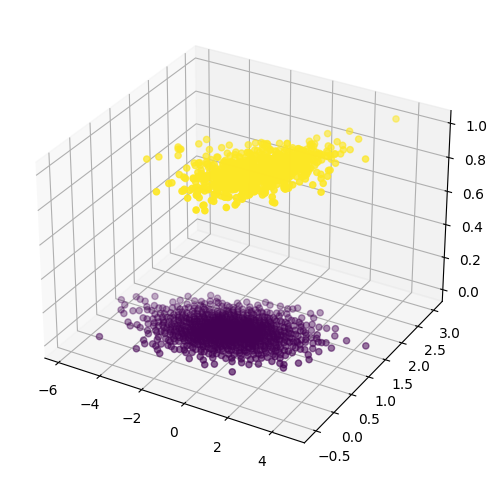

In [20]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111,projection='3d')
ax.scatter(df_new['X1'],df_new['X2'],df_new['Target'],c=df_new['Target'])
plt.show()

### dùng RandomUnderSampler

In [21]:
from imblearn.under_sampling import RandomUnderSampler

In [22]:
rs = RandomUnderSampler()

In [23]:
X_resamle2, y_resample2 = rs.fit_resample(X,y)

In [24]:
df_new2 = pd.DataFrame(X_resamle2,columns=['X1','X2'])
df_new2['target'] = y_resample2
df_new2.head()

,X1,X2,target
0,-1.452490,0.538335,0
1,0.138593,1.067411,0
2,-1.978160,0.509909,0
3,-1.161774,1.302969,0
4,-2.038620,0.417005,0


In [25]:
df_new2['target'].value_counts()

0    817
1    817
Name: target, dtype: int64

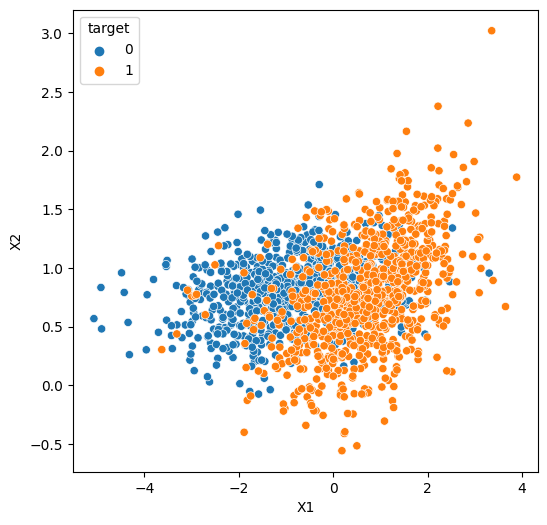

In [26]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_new2,x='X1',y='X2',hue='target')
plt.show()

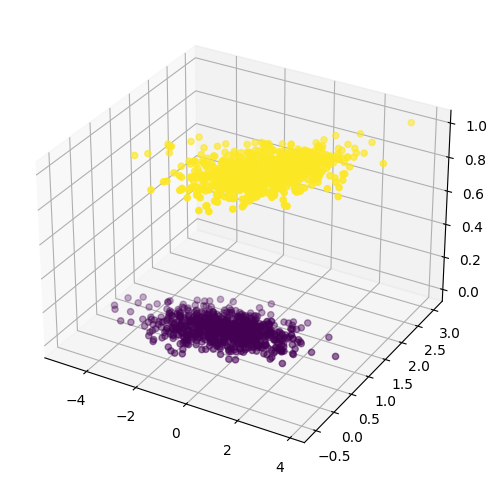

In [27]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111,projection='3d')
ax.scatter(df_new2['X1'],df_new2['X2'],df_new2['target'],c=df_new2['target'])
plt.show()

### dùng Resample

In [28]:
from sklearn.utils import resample

In [30]:
df_0 = df[df['Target'] == 0]
df_1 = df[df['Target'] == 1 ]

In [31]:
df_0.shape, df_1.shape

((14183, 3), (817, 3))

In [33]:
df_0_resample = resample(df_0,replace=False,n_samples=df_1.shape[0],random_state=0)

In [34]:
df_0_resample.shape

(817, 3)

In [35]:
df_new3 = pd.concat([df_0_resample,df_1])

In [39]:
df_new3 = pd.DataFrame(df_new3)

In [41]:
df_new3['Target'].value_counts()

0    817
1    817
Name: Target, dtype: int64

In [42]:
from mpl_toolkits.mplot3d import Axes3D

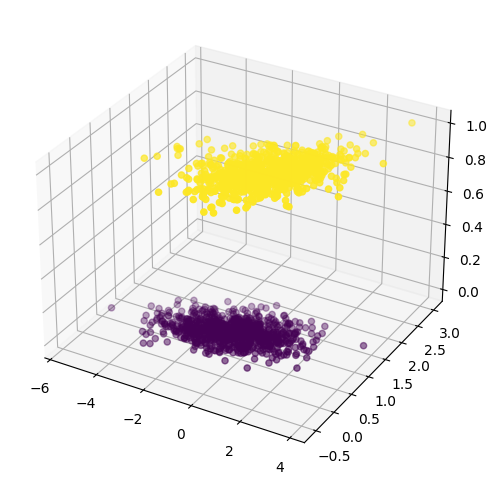

In [43]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111,projection='3d')
ax.scatter(df_new3['X1'],df_new3['X2'],df_new3['Target'],c=df_new3['Target'])
plt.show()